1)Data Collection and Loading

In [2]:
import pandas as pd
#Load our data set
df= pd.read_csv("incom2024_delay_example_dataset.csv")
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [4]:
df.tail()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
15544,DEBIT,108.042500,359.980000,45.0,Fishing,Caguas,Puerto Rico,8333.1170,Consumer,PR,...,Central America,Managua,COMPLETE,1004.0000,45.0,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2017-04-03 00:00:00+01:00,Standard Class,1
15545,DEBIT,22.480274,169.990000,46.0,Indoor/Outdoor Games,Caguas,Puerto Rico,3182.7766,Consumer,PR,...,South America,Yucatan,COMPLETE,1014.0000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2017-06-05 00:00:00+01:00,Standard Class,-1
15546,PAYMENT,15.861091,47.497177,35.0,Electronics,Del Rio,EE. UU.,9697.5720,Consumer,TX,...,Western Europe,North Rhine-Westphalia,PENDING_PAYMENT,823.7916,35.0,Bridgestone e6 Straight Distance NFL Carolina,30.00,2015-05-04 00:00:00+01:00,Standard Class,0
15547,TRANSFER,-23.254063,49.973537,17.0,Cleats,Caguas,Puerto Rico,1953.6525,Consumer,PR,...,Southeast Asia,West Java,PENDING,365.0000,17.0,Perfect Fitness Perfect Rip Deck,59.99,2016-04-07 00:00:00+01:00,Standard Class,1
15548,TRANSFER,177.790680,387.973020,9.0,Cardio Equipment,Caguas,Puerto Rico,6012.8926,Consumer,PR,...,South America,Tarapaca,PROCESSING,191.0000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2017-09-15 00:00:00+01:00,Second Class,1


In [3]:
df.shape

(15549, 41)

2)Data PreProcessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [7]:
df.describe()

,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,...,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price,label
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,...,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000
mean,22.604542,179.888256,31.461342,6583.279789,35458.234968,5.413462,29.677619,-84.512318,6586.810354,35718.970019,...,137.005272,0.120391,2.165202,200.562289,179.780850,22.273342,685.213286,31.387606,136.629368,0.349283
std,99.265198,113.727323,15.303616,4114.273782,37343.702033,1.581550,9.877876,20.681015,4101.324290,21071.742668,...,134.545269,0.474088,1.468627,125.984986,110.999735,117.503163,330.778230,15.256620,133.366285,0.826623
min,-3442.500000,8.351162,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025990,1.000000,1.000000,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-3442.500000,19.000000,2.000000,9.990000,-1.000000
25%,7.562795,104.397330,18.000000,3119.983200,725.000000,4.000000,18.263327,-98.088170,3177.568800,16530.752000,...,50.000000,0.080000,1.000000,119.980000,105.570910,7.443977,403.000000,18.000000,50.000000,0.000000
50%,31.693370,165.944170,29.000000,6429.229000,19145.775000,5.000000,33.435677,-76.580800,6308.530000,35391.336000,...,59.990000,0.270000,1.000000,199.920000,165.990000,32.440100,627.000000,29.000000,59.990000,1.000000
75%,63.872166,242.440930,45.000000,9642.381000,77502.820000,7.000000,39.277313,-66.370575,9703.070000,55236.910000,...,199.990000,0.360000,3.000000,299.950000,242.436400,64.303566,1004.000000,45.000000,199.990000,1.000000
max,911.800000,1939.990000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263080,20757.000000,77204.000000,...,1999.990000,0.500000,5.000000,1999.990000,1939.990000,911.800000,1363.000000,76.000000,1999.990000,1.000000


3)Data Cleaning

In [8]:
df.isnull().sum()

,0
payment_type,0
profit_per_order,0
sales_per_customer,0
category_id,0
category_name,0
customer_city,0
customer_country,0
customer_id,0
customer_segment,0
customer_state,0


In [9]:
data = df.drop_duplicates()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.490990,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.990080,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.966430,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.150650,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0000,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.978240,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15544,DEBIT,108.042500,359.980000,45.0,Fishing,Caguas,Puerto Rico,8333.1170,Consumer,PR,...,Central America,Managua,COMPLETE,1004.0000,45.0,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2017-04-03 00:00:00+01:00,Standard Class,1
15545,DEBIT,22.480274,169.990000,46.0,Indoor/Outdoor Games,Caguas,Puerto Rico,3182.7766,Consumer,PR,...,South America,Yucatan,COMPLETE,1014.0000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2017-06-05 00:00:00+01:00,Standard Class,-1
15546,PAYMENT,15.861091,47.497177,35.0,Electronics,Del Rio,EE. UU.,9697.5720,Consumer,TX,...,Western Europe,North Rhine-Westphalia,PENDING_PAYMENT,823.7916,35.0,Bridgestone e6 Straight Distance NFL Carolina,30.00,2015-05-04 00:00:00+01:00,Standard Class,0
15547,TRANSFER,-23.254063,49.973537,17.0,Cleats,Caguas,Puerto Rico,1953.6525,Consumer,PR,...,Southeast Asia,West Java,PENDING,365.0000,17.0,Perfect Fitness Perfect Rip Deck,59.99,2016-04-07 00:00:00+01:00,Standard Class,1


In [63]:
print(data.isnull().sum())

payment_type                0
profit_per_order            0
sales_per_customer          0
category_id                 0
category_name               0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customer_state              0
customer_zipcode            0
department_id               0
department_name             0
latitude                    0
longitude                   0
market                      0
order_city                  0
order_country               0
order_customer_id           0
order_date                  0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total_amount     0
order_profit_per_order      0
order_region                0
order_state                 0
order_stat

4)Data Analysis

In [10]:
import matplotlib.pyplot as plt


In [41]:
print(df.columns)

Index(['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total_amount', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date', 'shipping_mode',
       'label'],
      dtype='object')


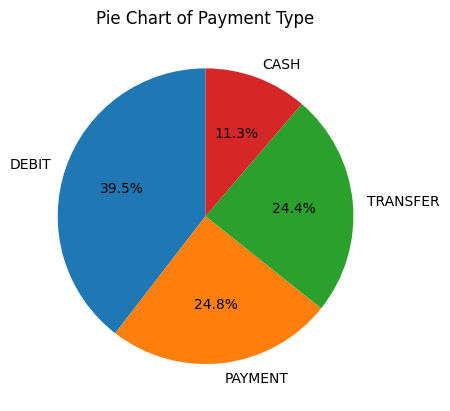

In [40]:
df['payment_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Payment Type')
plt.ylabel('')  # No need for Y-axis label in pie charts
plt.show()


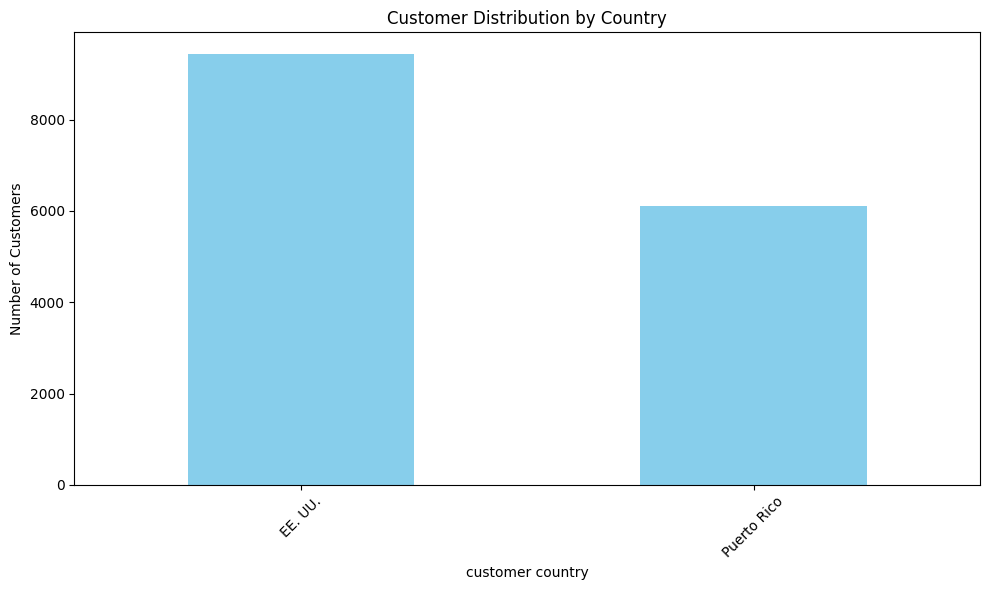

In [44]:
country_counts = df['customer_country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Country')
plt.xlabel('customer country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

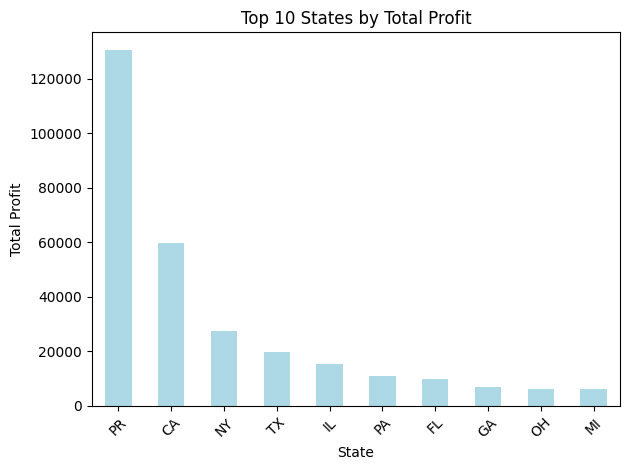

In [59]:
customer_state_profit_per_order= df.groupby('customer_state')['profit_per_order'].sum().sort_values(ascending=False)
top_states = customer_state_profit_per_order.head(10)
top_states.plot(kind='bar', color='lightblue')
plt.title('Top 10 States by Total Profit')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

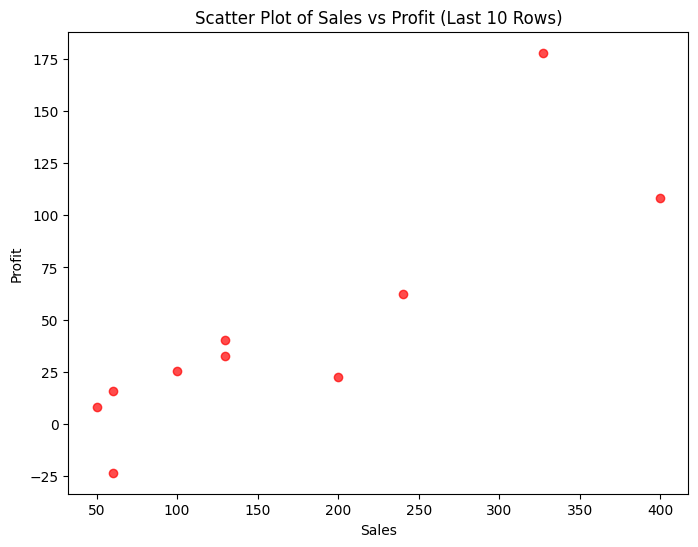

In [64]:
last_10_rows = df.tail(10)
plt.figure(figsize=(8, 6))
plt.scatter(last_10_rows['sales'], last_10_rows['profit_per_order'], alpha=0.7, color='red', marker='o')
plt.title('Scatter Plot of Sales vs Profit (Last 10 Rows)')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

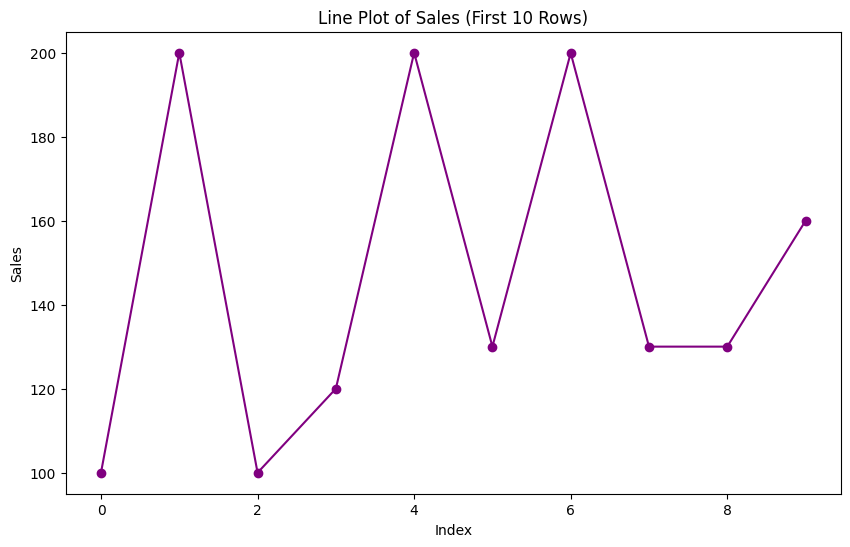

In [65]:
first_10_rows = df.head(10)
plt.figure(figsize=(10, 6))
plt.plot(first_10_rows.index, first_10_rows['sales'], marker='o', linestyle='-', color='purple')
plt.title('Line Plot of Sales (First 10 Rows)')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

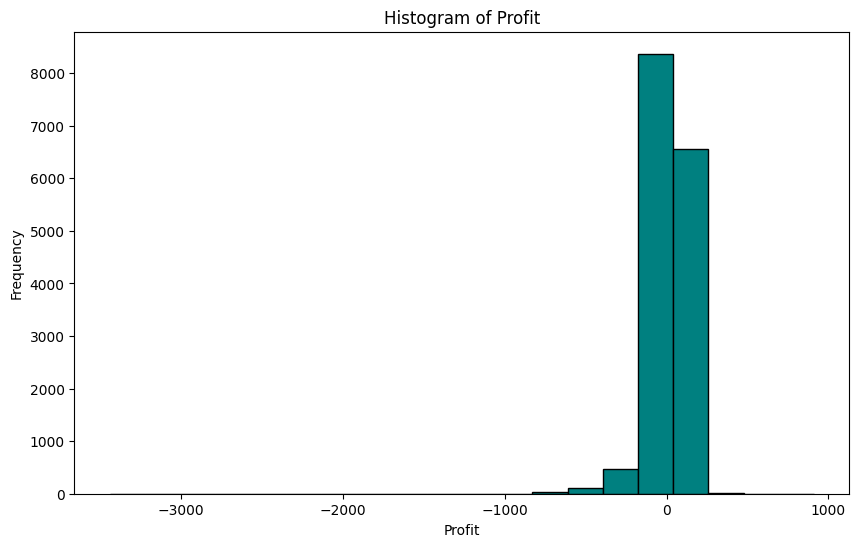

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df['profit_per_order'], bins=20, color='teal', edgecolor='black')
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


Conclusion:
1)payment type by using debit card is high which is 39.5%.
2)In EE.UU Country the profit is high.
